# TASK -2

## TITANIC SURVIVAL PREDICTION

- Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
- The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
df = pd.read_csv("E:\CodSoft\Titanic\data\Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
# Fill Age with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)


In [53]:
# Creating a new feature to indicate the presence of a cabin
df['Cabin_known'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)


In [54]:
# Fill missing values in 'Embarked' with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


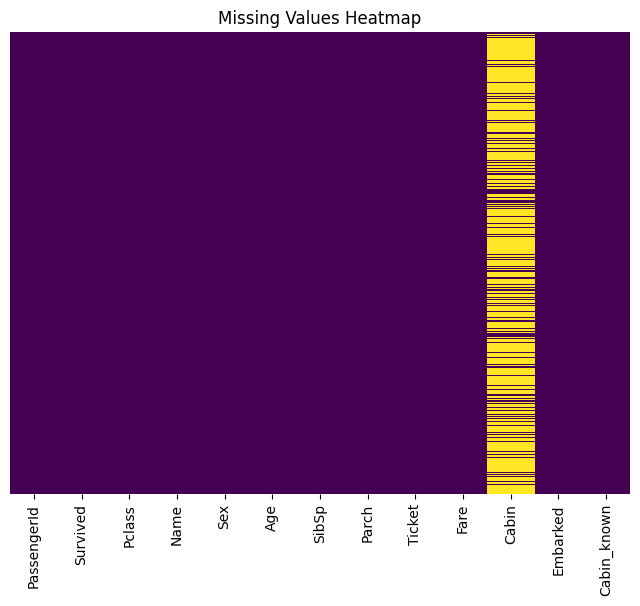

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


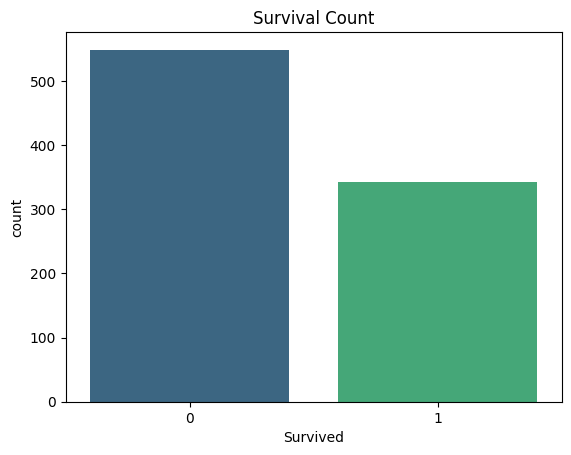

In [56]:
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.show()


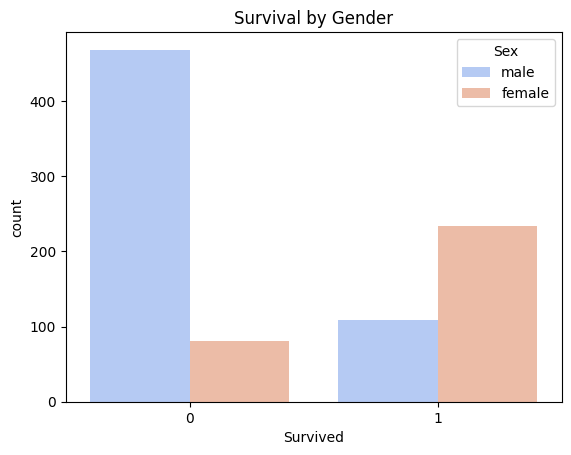

In [57]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()


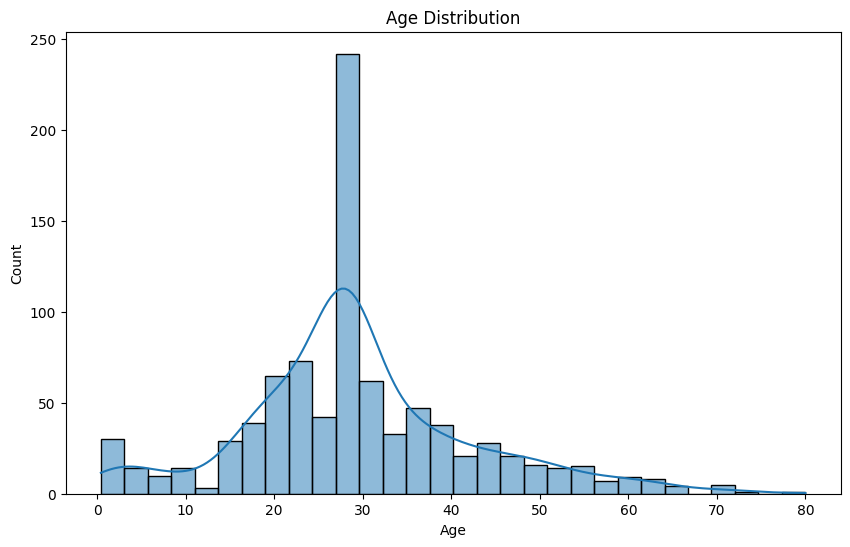

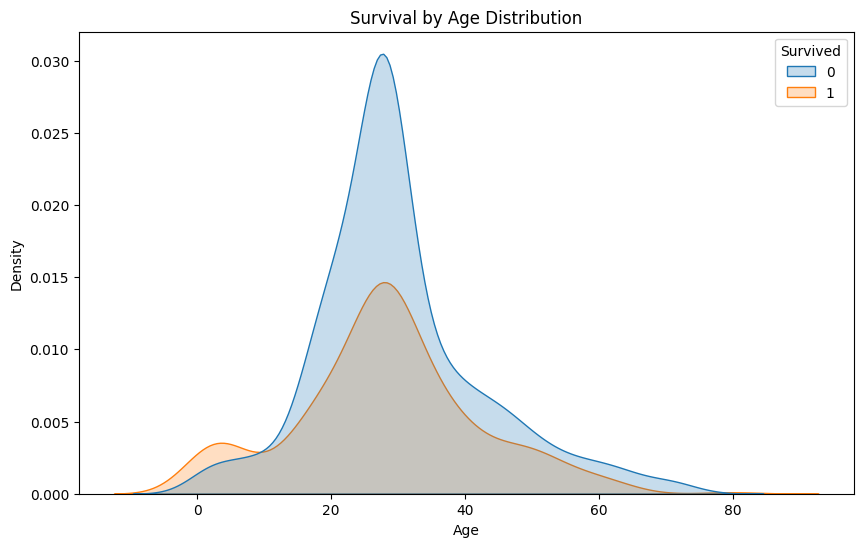

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Survival by Age
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Survival by Age Distribution')
plt.show()


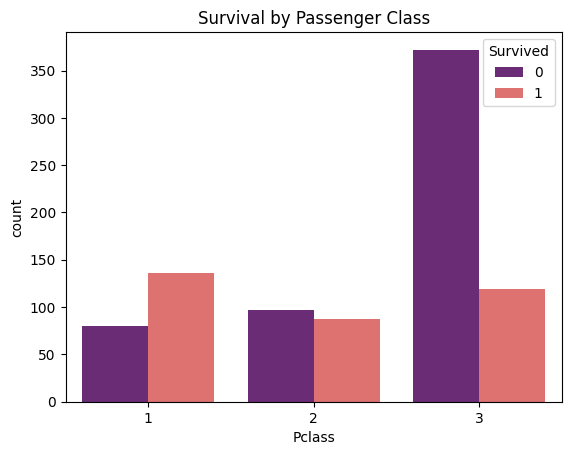

In [59]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='magma')
plt.title('Survival by Passenger Class')
plt.show()


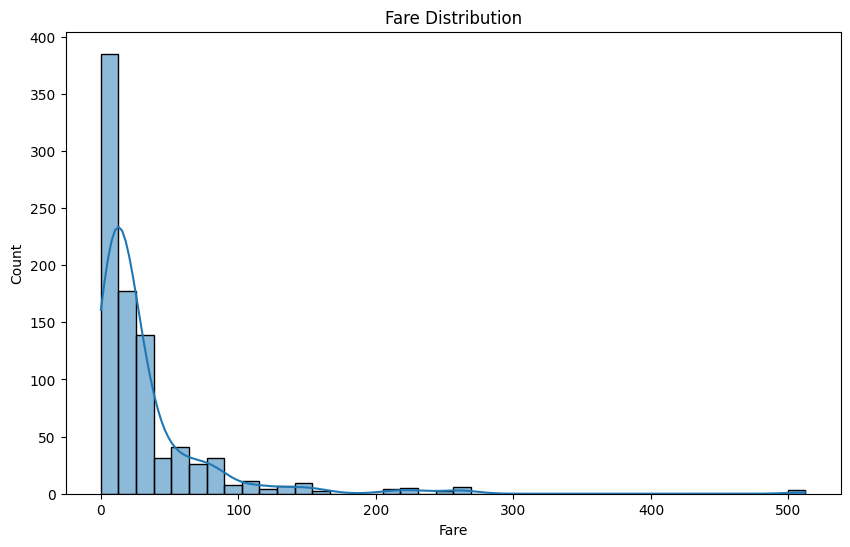

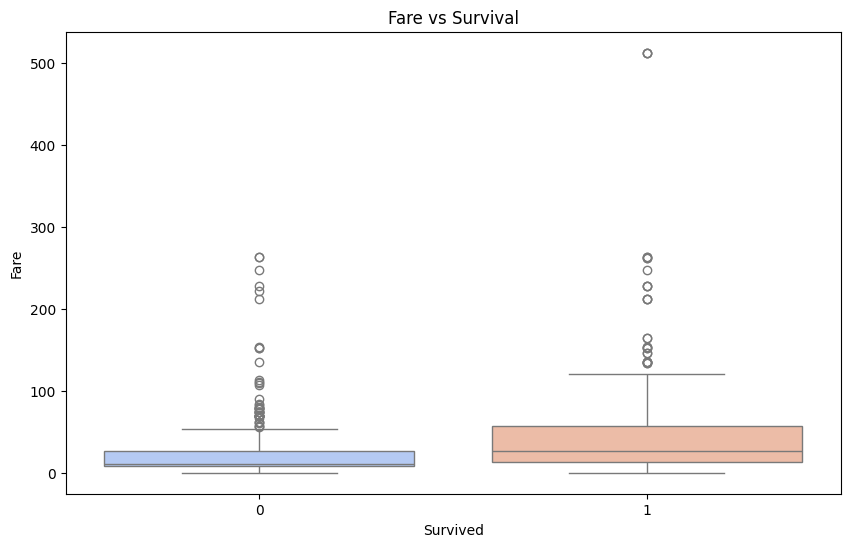

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.show()

# Fare vs Survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')
plt.title('Fare vs Survival')
plt.show()


In [61]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()


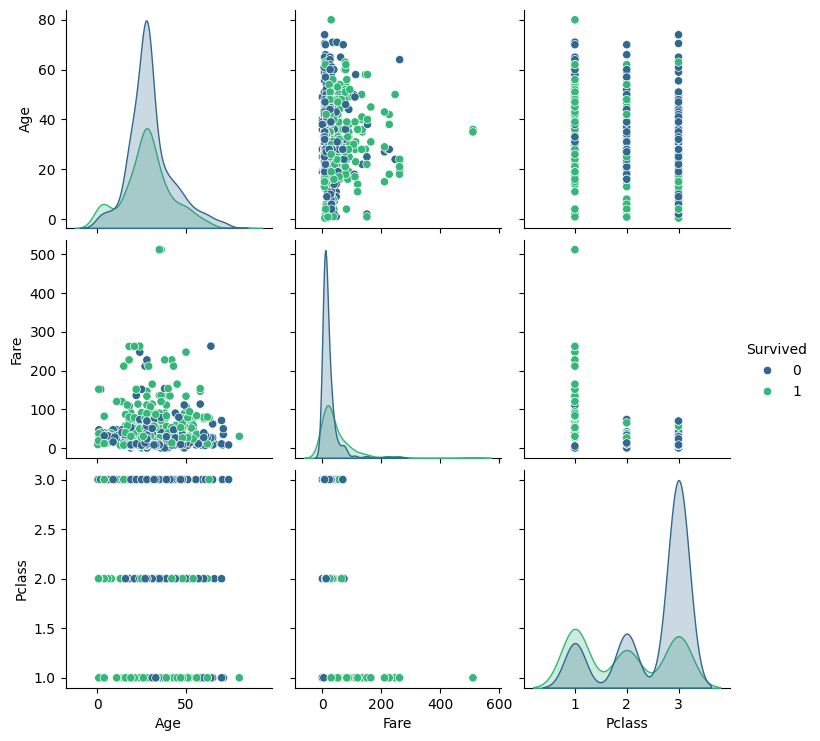

In [62]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='viridis')
plt.show();


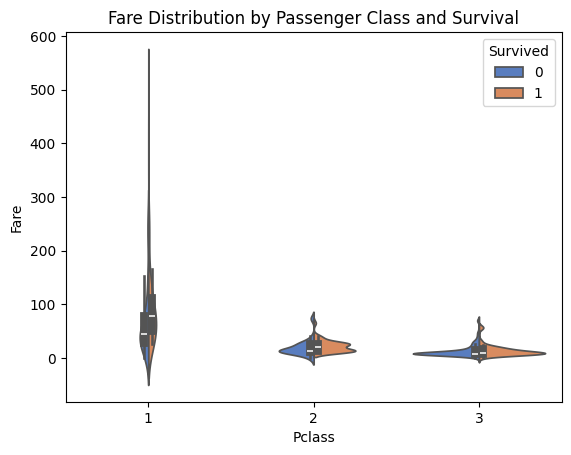

In [63]:
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, split=True, palette='muted')
plt.title('Fare Distribution by Passenger Class and Survival')
plt.show()


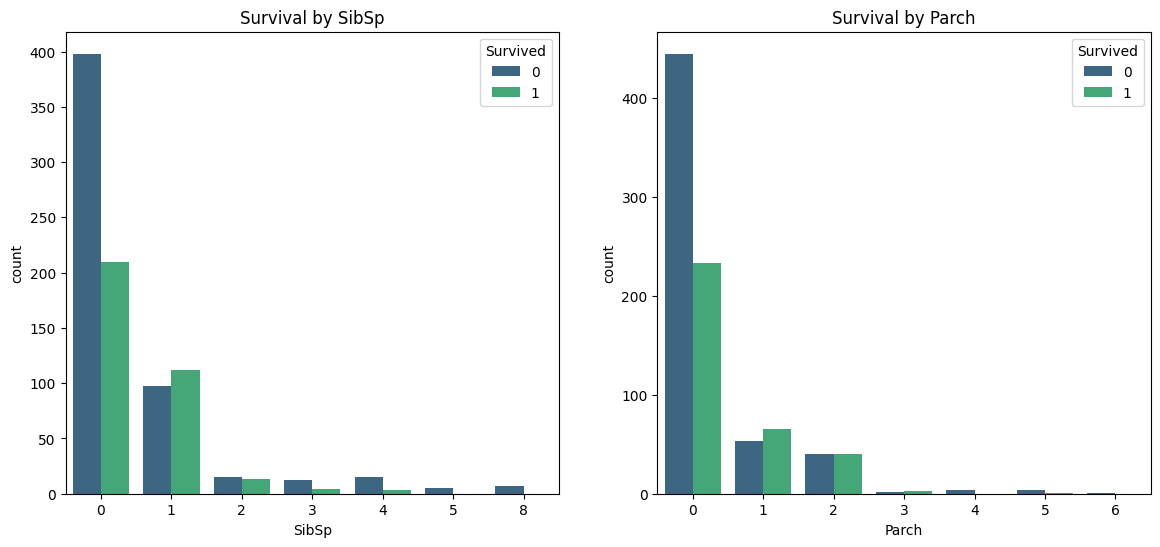

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.countplot(x='SibSp', hue='Survived', data=df, palette='viridis', ax=ax[0])
ax[0].set_title('Survival by SibSp')
sns.countplot(x='Parch', hue='Survived', data=df, palette='viridis', ax=ax[1])
ax[1].set_title('Survival by Parch')
plt.show()


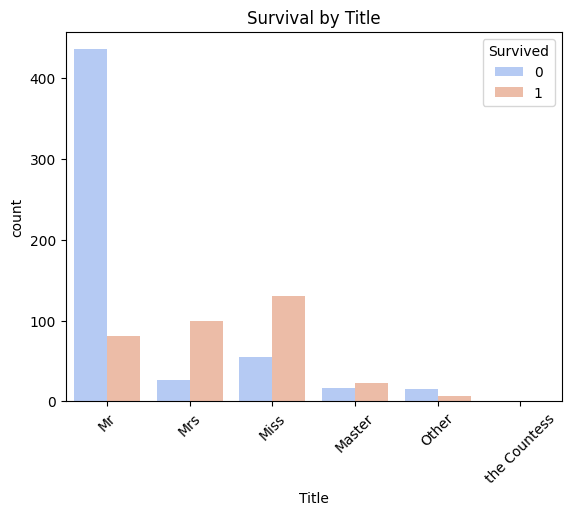

In [65]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Replace rare titles with "Other"
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
                                    'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Visualizing Title by Survival
sns.countplot(x='Title', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Title')
plt.xticks(rotation=45)
plt.show()


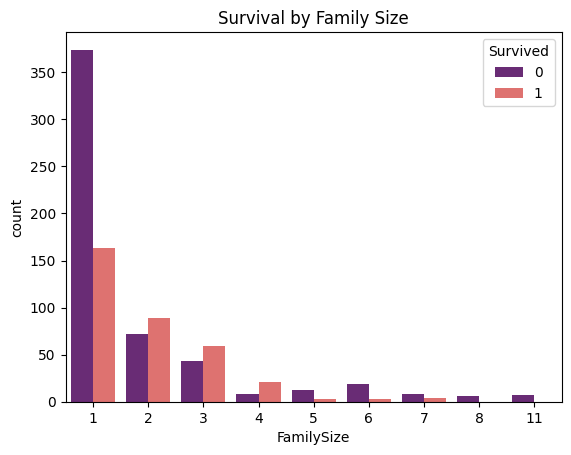

In [66]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Visualizing Family Size by Survival
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='magma')
plt.title('Survival by Family Size')
plt.show()


In [67]:
# One-hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

# Label encoding for 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [68]:
from sklearn.model_selection import train_test_split

# Features (drop PassengerId, Name, Ticket, Cabin, and Survived)
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)

# Target
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 15), (179, 15), (712,), (179,))

In [69]:
categorical_cols=X.select_dtypes(include='O').columns
numerical_cols=X.select_dtypes(exclude='O').columns

In [70]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder()),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [71]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_known',
       'FamilySize', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_the Countess'],
      dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('scaler', StandardScaler())]),
                                 Index([], dtype='object'))])

In [72]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [74]:
X_train.head()

,num_pipeline__Pclass,num_pipeline__Sex,num_pipeline__Age,num_pipeline__SibSp,num_pipeline__Parch,num_pipeline__Fare,num_pipeline__Cabin_known,num_pipeline__FamilySize,num_pipeline__Embarked_Q,num_pipeline__Embarked_S,num_pipeline__Title_Miss,num_pipeline__Title_Mr,num_pipeline__Title_Mrs,num_pipeline__Title_Other,num_pipeline__Title_the Countess
0,-1.614136,-0.724310,1.253641,-0.470722,-0.479342,-0.078684,1.864936,-0.554666,-0.303355,0.592489,-0.507888,0.836232,-0.397144,-0.15162,-0.037503
1,-0.400551,-0.724310,-0.477284,-0.470722,-0.479342,-0.377145,-0.536211,-0.554666,-0.303355,0.592489,-0.507888,0.836232,-0.397144,-0.15162,-0.037503
2,0.813034,-0.724310,0.215086,-0.470722,-0.479342,-0.474867,-0.536211,-0.554666,-0.303355,0.592489,-0.507888,0.836232,-0.397144,-0.15162,-0.037503
3,0.813034,-0.724310,-0.246494,0.379923,-0.479342,-0.476230,-0.536211,0.040096,-0.303355,0.592489,-0.507888,0.836232,-0.397144,-0.15162,-0.037503
4,0.813034,1.380624,-1.785093,2.931860,2.048742,-0.025249,-0.536211,3.013909,-0.303355,0.592489,1.968937,-1.195840,-0.397144,-0.15162,-0.037503


In [75]:
X_test.head()

,num_pipeline__Pclass,num_pipeline__Sex,num_pipeline__Age,num_pipeline__SibSp,num_pipeline__Parch,num_pipeline__Fare,num_pipeline__Cabin_known,num_pipeline__FamilySize,num_pipeline__Embarked_Q,num_pipeline__Embarked_S,num_pipeline__Title_Miss,num_pipeline__Title_Mr,num_pipeline__Title_Mrs,num_pipeline__Title_Other,num_pipeline__Title_the Countess
0,0.813034,-0.724310,-0.092634,0.379923,0.784700,-0.333901,-0.536211,0.634859,-0.303355,-1.687794,-0.507888,-1.195840,-0.397144,-0.15162,-0.037503
1,-0.400551,-0.724310,0.138156,-0.470722,-0.479342,-0.425284,-0.536211,-0.554666,-0.303355,0.592489,-0.507888,0.836232,-0.397144,-0.15162,-0.037503
2,0.813034,-0.724310,-0.708074,-0.470722,-0.479342,-0.474867,-0.536211,-0.554666,-0.303355,0.592489,-0.507888,0.836232,-0.397144,-0.15162,-0.037503
3,-0.400551,1.380624,-1.785093,-0.470722,0.784700,0.007966,-0.536211,0.040096,-0.303355,0.592489,1.968937,-1.195840,-0.397144,-0.15162,-0.037503
4,0.813034,1.380624,-1.169653,0.379923,-0.479342,-0.411002,-0.536211,0.040096,-0.303355,-1.687794,1.968937,-1.195840,-0.397144,-0.15162,-0.037503


In [76]:
models={
    'LogisticRegression':LogisticRegression(),
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(algorithm='auto',p=2)
}

In [89]:
params={
    "LogisticRegression": {
        'penalty':['l1', 'l2', 'elasticnet', None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    
    
    "SVC":{
        # 'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],      
    },
    
    
    'DecisionTreeClassifier':{
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth':[5,10,15,20,25,30,35,40],
        'splitter':['best','random']
        },
    
    
    
    'RandomForestClassifier':{
        'n_estimators': [10,20,30,40,50,60,70,80],
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth':[5,10,15,20,25]
        # ,'learning_rate':[.1,.01,.05,.001]
    },
    
    'GradientBoostingClassifier':{
        'loss':['log_loss','exponential'],
        'n_estimators':[50,100,150],
        'criterion':['friedman_mse','squared_error'],
        'learning_rate':[.1,.01,.05,.001]
    },
    
    
    
    'AdaBoostClassifier':{
        'n_estimators':[50,100,150,200],
        'algorithm':['SAMME', 'SAMME.R'],
        'learning_rate':[.1,.01,.05,.001]  
    },
    
    
    
    
    'KNeighborsClassifier':{
        'n_neighbors':[3,4,5,6,7,8]
        
        
    }
    
    
    
}

In [78]:
from sklearn.metrics import accuracy_score

In [90]:
from sklearn.model_selection import GridSearchCV
def get_best_model(X_train,y_train,X_test,y_test,model_dict,params_,base_accuracy=0.7):
    models = model_dict.keys()
    for model in models:
        print(f'Initial base accuracy is {base_accuracy}')
        print(20*'*',"Estimator: ",model,20*'*')
        gs = GridSearchCV(estimator=model_dict[model],param_grid=params_[model],cv=3)
        gs.fit(X_train,y_train)
        print(f'Best parameters are :{gs.best_params_} With accuracy score:{gs.best_score_}')
        
        regressor = model_dict[model].set_params(**gs.best_params_)
        regressor.fit(X_train,y_train)

        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)
        
        train_model_score = accuracy_score(y_train, y_train_pred)

        test_model_score = accuracy_score(y_test, y_test_pred)
        
        if test_model_score >= base_accuracy:
            print('Acceptabel model found!')
            base_accuracy = test_model_score
            best_model = {model:regressor}
        else:
            print('Model rejected\n',30*'__')
            
    
    print(f"Best model is:{list(best_model.keys())} with accuracy score: {round(test_model_score,2)}")        
    return best_model

In [91]:
get_best_model(X_train,y_train,X_test,y_test,model_dict=models,params_=params)

Initial base accuracy is 0.7
******************** Estimator:  LogisticRegression ********************
Best parameters are :{'penalty': 'l1', 'solver': 'liblinear'} With accuracy score:0.8272701485657553
Acceptabel model found!
Initial base accuracy is 0.8268156424581006
******************** Estimator:  SVC ********************
Best parameters are :{} With accuracy score:0.8342729496862037
Acceptabel model found!
Initial base accuracy is 0.8268156424581006
******************** Estimator:  DecisionTreeClassifier ********************
Best parameters are :{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'} With accuracy score:0.818837239537165
Acceptabel model found!
Initial base accuracy is 0.8268156424581006
******************** Estimator:  RandomForestClassifier ********************
Best parameters are :{'criterion': 'log_loss', 'max_depth': 5, 'n_estimators': 40} With accuracy score:0.8370858892080039
Acceptabel model found!
Initial base accuracy is 0.8324022346368715
******

{'RandomForestClassifier': RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=40)}

In [92]:
model=RandomForestClassifier(criterion='log_loss',max_depth=5,n_estimators=40)

In [93]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=40)

In [94]:
y_pred=model.predict(X_test)

In [95]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [96]:
print(accuracy_score(y_test,y_pred))

0.8156424581005587
